# About Dataset

<font size="4">Context</font>

<font size="3">An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.</font>

<font size="4">Content</font>

<font size="3">In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.</font>

<font size="3">You are required to help the manager to predict the right group of the new customers.</font>


# Import Libraries

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# EDA + Filling MV + Encoding

In [5]:
df = pd.read_csv("./Test.csv")

In [3]:
df.shape

(2627, 10)

In [4]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [6]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [7]:


def filling_encoding(data,feature):
    le = LabelEncoder()
    if data[feature].isnull().sum() != 0:
        data[feature] = data[feature].fillna("Unknown")
    data[feature]  = le.fit_transform(data[feature])
    return data

<Axes: xlabel='Work_Experience', ylabel='Count'>

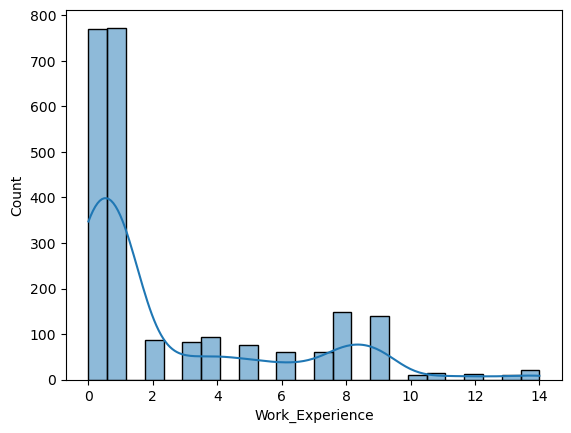

In [8]:
sns.histplot(df['Work_Experience'], kde=True)

<Axes: xlabel='Family_Size', ylabel='Count'>

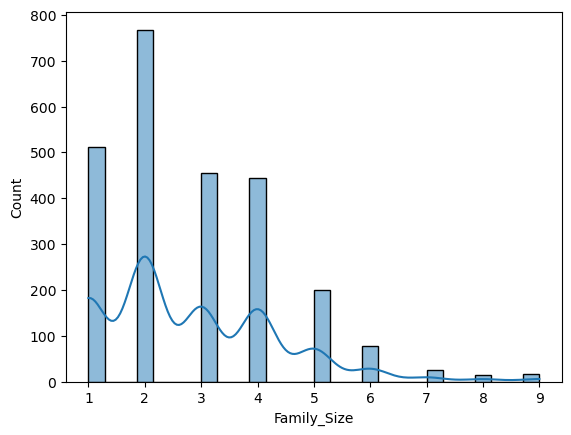

In [9]:
sns.histplot(df['Family_Size'], kde=True)

In [10]:
df = filling_encoding(df,'Ever_Married')
df = filling_encoding(df,"Gender")
df = filling_encoding(df,"Graduated")
df = filling_encoding(df,"Profession")
df = filling_encoding(df,"Var_1")
df = filling_encoding(df,"Spending_Score")
df['Work_Experience'].fillna(df['Work_Experience'].mode()[0], inplace=True)
df['Family_Size'].fillna(df['Family_Size'].mode()[0], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   int32  
 2   Ever_Married     2627 non-null   int32  
 3   Age              2627 non-null   int64  
 4   Graduated        2627 non-null   int32  
 5   Profession       2627 non-null   int32  
 6   Work_Experience  2627 non-null   float64
 7   Spending_Score   2627 non-null   int32  
 8   Family_Size      2627 non-null   float64
 9   Var_1            2627 non-null   int32  
dtypes: float64(2), int32(6), int64(2)
memory usage: 143.8 KB


In [12]:
for column in df.select_dtypes(include=['int32']).columns:
    df[column] = df[column].astype('int64')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   int64  
 2   Ever_Married     2627 non-null   int64  
 3   Age              2627 non-null   int64  
 4   Graduated        2627 non-null   int64  
 5   Profession       2627 non-null   int64  
 6   Work_Experience  2627 non-null   float64
 7   Spending_Score   2627 non-null   int64  
 8   Family_Size      2627 non-null   float64
 9   Var_1            2627 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 205.4 KB


# Model(K-means) + PCA

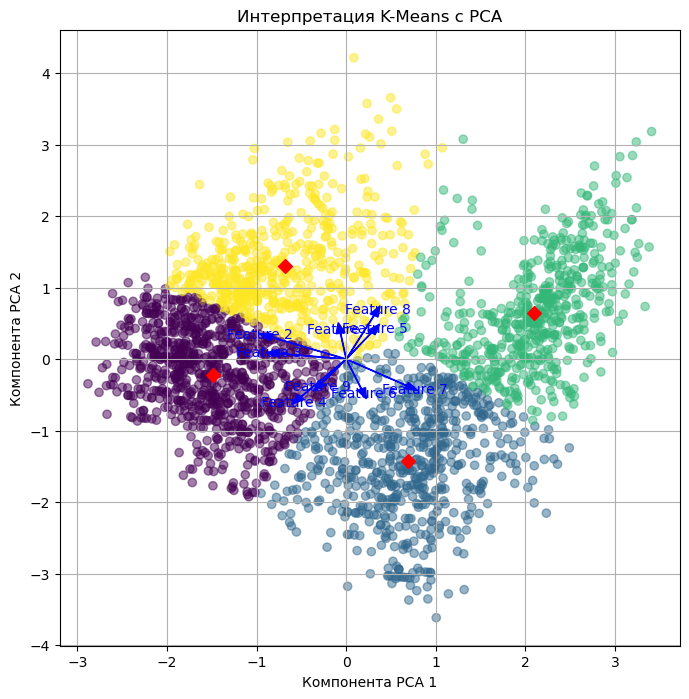

In [14]:
df_without_id = df.drop("ID",axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_without_id)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_pca)
y_kmeans = kmeans.predict(df_pca)

centroids_pca = kmeans.cluster_centers_

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(8, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_kmeans, alpha=0.5)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='D', s=50, color='red')

for i, (comp1, comp2) in enumerate(loadings):
    plt.arrow(0, 0, comp1, comp2, color='b', width=0.005, head_width=0.1)
    plt.text(comp1*1.15, comp2*1.15, f'Feature {i+1}', color='b', ha='center', va='center')

plt.xlabel('Компонента PCA 1')
plt.ylabel('Компонента PCA 2')
plt.title('Интерпретация K-Means с PCA')
plt.grid(True)
plt.show()

# Model(Hierarchical Clustering)

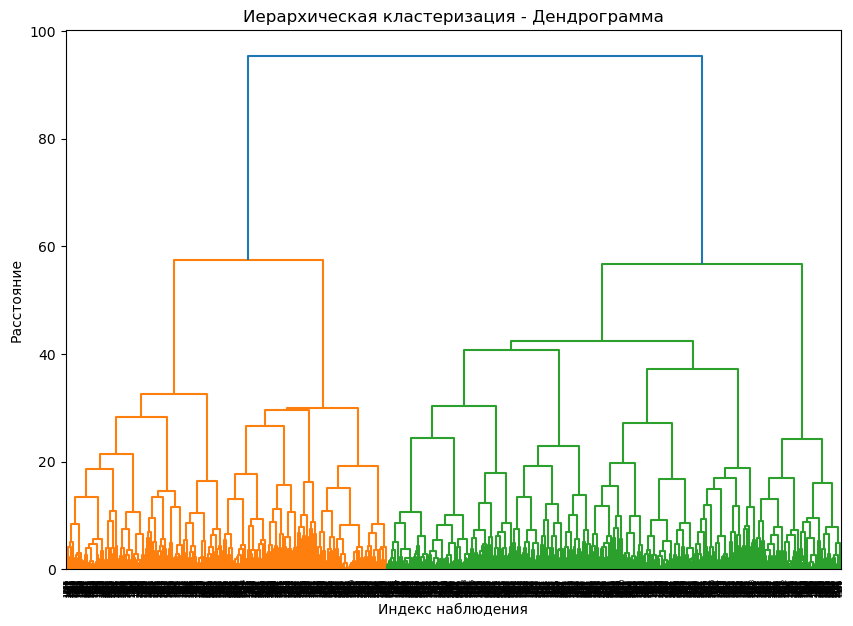

In [15]:
Z = linkage(df_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Иерархическая кластеризация - Дендрограмма')
plt.xlabel('Индекс наблюдения')
plt.ylabel('Расстояние')
plt.show()

# Post-training analysis

In [16]:
df['Cluster_Label'] = y_kmeans

In [17]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster_Label
0,458989,0,2,36,2,2,0.0,2,1.0,5,1
1,458994,1,2,37,2,5,8.0,0,4.0,5,3
2,458996,0,2,69,0,9,0.0,2,1.0,5,3
3,459000,1,2,59,0,4,11.0,1,2.0,5,0
4,459001,0,0,19,0,8,1.0,2,4.0,5,2


In [18]:
cluster_summary = df.groupby('Cluster_Label').agg(['mean', 'median', 'std', 'count'])
print(cluster_summary)

                          ID                                 Gender         \
                        mean    median          std count      mean median   
Cluster_Label                                                                
0              463525.358333  463574.5  2732.065335   840  0.535714    1.0   
1              463213.307099  463054.5  2651.309749   648  0.344136    0.0   
2              463545.092657  463475.0  2548.848750   572  0.590909    1.0   
3              463438.426808  463404.0  2463.897254   567  0.728395    1.0   

                              Ever_Married         ... Spending_Score        \
                    std count         mean median  ...            std count   
Cluster_Label                                      ...                        
0              0.499020   840     1.982143    2.0  ...       0.871192   840   
1              0.475453   648     0.354938    0.0  ...       0.129647   648   
2              0.492096   572     0.138112    0.0  ...    

In [19]:
for i in range(kmeans.n_clusters):
    cluster_data = df[df['Cluster_Label'] == i]
    print(f"Cluster {i}:")
    print(cluster_data.describe(), "\n")

Cluster 0:
                  ID      Gender  Ever_Married         Age   Graduated  \
count     840.000000  840.000000    840.000000  840.000000  840.000000   
mean   463525.358333    0.535714      1.982143   54.761905    1.895238   
std      2732.065335    0.499020      0.149421   15.176765    0.440475   
min    459000.000000    0.000000      0.000000   25.000000    0.000000   
25%    461309.500000    0.000000      2.000000   43.000000    2.000000   
50%    463574.500000    1.000000      2.000000   52.000000    2.000000   
75%    466027.250000    1.000000      2.000000   65.000000    2.000000   
max    467946.000000    1.000000      2.000000   89.000000    2.000000   

       Profession  Work_Experience  Spending_Score  Family_Size       Var_1  \
count  840.000000       840.000000      840.000000   840.000000  840.000000   
mean     1.934524         2.003571        0.895238     2.269048    4.654762   
std      2.572755         2.750011        0.871192     0.930989    1.091675   
min   